## <span style="color:blue">Introduction to computation in physical sciences</span>
### J Wang and A Wang, [github.com/com-py/intro](https://github.com/com-py/intro) 
### Ch08, `p6-warming`, Global warming and energy balance

In [1]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, RadioButtons
import numpy as np
%matplotlib notebook

In [2]:
sunflux = 1300.
ocean_depth = 1000.
specific_heat = 4182.
water_density = 1000.
mass = 4*ocean_depth*water_density

secs = 365*24*3600/2    # seconds in a year, sunny half the time
time = np.linspace(0, 100, 101) # in years

def updatefig(*args):           # update figure data
    eta = slider.val
    heat = sunflux*time*secs*(eta/100)
    if button.value_selected == items[1]:           # nonlinear
        nonl = np.linspace(1, np.sqrt(2+eta/10), 101)**2    # nonlinear effects
        heat = heat*nonl
    deltaT = heat/(specific_heat*mass)
    plot.set_ydata(deltaT)
    ax.set_ylim(min(deltaT), max(deltaT))
    etat.set_text('$\eta=$'+repr(eta)[:4]+'%')       # 4 digits
    fig.canvas.draw_idle()

<IPython.core.display.Javascript object>


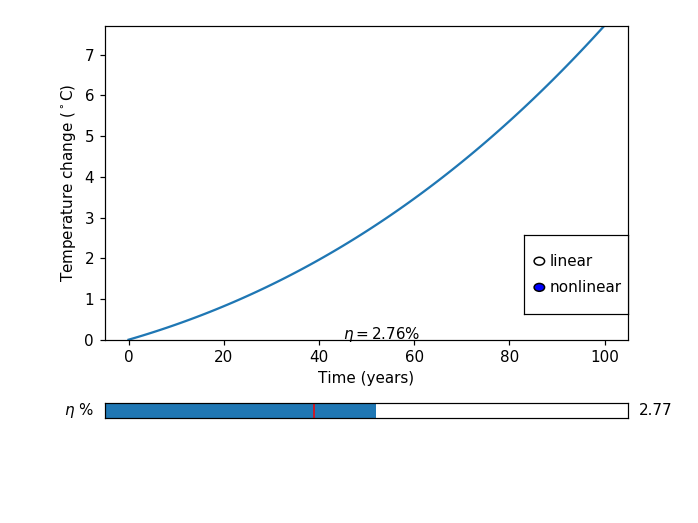

In [3]:
%matplotlib notebook
fig = plt.figure()
fig.canvas.set_window_title('Earth warming')
fig.subplots_adjust(left=0.15, bottom=0.35, top=.95)
ax = fig.add_subplot(111)
plot = ax.plot(time, [0]*len(time))[0]
plt.xlabel('Time (years)')
plt.ylabel('Temperature change ($^\circ$C)')
etat = plt.text(45, .01, '', color='black')         # eta text

axes = fig.add_axes([.15, .20, .75, .03])           # trap slider
slider = Slider(axes, '$\eta$ %', -5, 10, 1)          # range, init val
slider.on_changed(updatefig)

items = ['linear', 'nonlinear']         # add buttons    
baxes =fig.add_axes([.75, .4, .15, .15])
button = RadioButtons(baxes, items, 1)  # active = nonlinear (1)
button.on_clicked(updatefig)  

updatefig(None)
plt.show()